### Creating clusters for the songs we scraped from spotify

In [15]:
# import libraries
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
from random import randint
from tqdm import tqdm


In [16]:
musicdata = pd.read_csv('spotifydata.csv') # read spotify data into dataframe
musicdata.drop(['Unnamed: 0'], axis = 1, inplace = True)  # drop weird new axis
original = musicdata  # make a copy
original

,artist,title,tid,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,waka flocka flame,no hands (feat. roscoe dash & wale),03tqyYWC9Um2ZqU0ZN849H,0.760,0.595,1,-6.366,1,0.0391,0.005440,0.000000,0.2410,0.361,131.497
1,trick daddy,take it to da house,1wLhwzPAtze5JT8qqXlqaO,0.935,0.780,6,-5.795,0,0.1970,0.015800,0.000000,0.1640,0.918,123.895
2,dmx,ruff ryders' anthem,1BKT2I9x4RGKaKqW4up34s,0.880,0.577,10,-8.093,0,0.3020,0.056400,0.000001,0.2010,0.740,90.991
3,ugk,int'l players anthem (i choose you) (feat. out...,4ns1XFP3W5JPyzvnAjMdHD,0.675,0.680,4,-5.010,0,0.2560,0.065500,0.000000,0.3540,0.845,155.698
4,lil jon & the east side boyz,what u gon' do,1bTphHXspys3RvvRxfzzIc,0.838,0.724,1,-6.900,0,0.2420,0.000077,0.000001,0.1620,0.537,150.192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,wilco,love is everywhere (beware),7sxr5Pvovng4ECTiCqeSWm,0.313,0.520,7,-9.436,1,0.0298,0.120000,0.452000,0.0993,0.511,144.249
9839,orville peck,dead of night,4WDazmiEd5PyY3taS11VfD,0.454,0.548,2,-11.618,1,0.0547,0.820000,0.356000,0.0606,0.500,99.892
9840,michaela anne,desert dove,7oC1Lo7hqhpxIU8d5iH6cc,0.592,0.419,2,-9.441,1,0.0296,0.349000,0.001020,0.0896,0.370,119.868
9841,joan shelley,coming down for you,4bDALATwj7AYLJ9h8cImWf,0.528,0.338,5,-10.942,0,0.0302,0.969000,0.077900,0.1600,0.555,92.262


In [17]:
# first i drop the unnecessary columns for the model
musicdata = musicdata.drop(['artist', 'title', 'tid'], axis = 1)

In [18]:
# define x as the variables we want to cluster
X = musicdata
# scale numerical values
X_prep = StandardScaler().fit_transform(X)
# look at the array

In [19]:
# create a dataframe from the scaled array
X_prep_df = pd.DataFrame(X_prep, columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])
X_prep_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.026783,0.314932,-1.193932,0.630667,0.738549,-0.424550,-1.229003,-0.594192,0.618417,-0.382922,0.491431
1,1.933218,0.972119,0.215672,0.709186,-1.354006,1.270515,-1.200801,-0.594192,0.015207,1.638251,0.240988
2,1.648338,0.250989,1.343356,0.393186,-1.354006,2.397696,-1.090281,-0.594189,0.305061,0.992346,-0.843011
3,0.586515,0.616882,-0.348169,0.817133,-1.354006,1.903883,-1.065509,-0.594192,1.503646,1.373357,1.288715
4,1.430794,0.773186,-1.193932,0.557236,-1.354006,1.753593,-1.243602,-0.594189,-0.000460,0.255725,1.107324
...,...,...,...,...,...,...,...,...,...,...,...
9838,-1.288509,0.048504,0.497593,0.208508,0.738549,-0.524386,-0.917151,0.666271,-0.491645,0.161380,0.911536
9839,-0.558182,0.147970,-0.912011,-0.091541,0.738549,-0.257083,0.988367,0.398562,-0.794816,0.121464,-0.549774
9840,0.156606,-0.310285,-0.912011,0.207821,0.738549,-0.526533,-0.293774,-0.591347,-0.567634,-0.350264,0.108321
9841,-0.174890,-0.598026,-0.066248,0.001416,-1.354006,-0.520092,1.393970,-0.376957,-0.016128,0.321041,-0.801139


### I first ran the model with 500 clusters, because I wanted to get Inertia as low as possible, but that lead to...interesting recommendations. 
After tuning the model and visualising shilouette score and K I settled for 81 clusters

In [20]:
# define the model, 50 clusters, define random state
kmeans = KMeans(n_clusters=81, random_state=1234)
# fit the model to the dataframe
kmeans.fit(X_prep_df)

KMeans(n_clusters=81, random_state=1234)

In [21]:
# take a look at the cluster centers
kmeans.cluster_centers_

array([[ 9.79220726e-01,  7.90454041e-01, -4.05077922e-02,
         6.25479641e-01, -1.35400640e+00, -1.63800172e-01,
        -7.63095094e-01, -4.75321662e-01, -4.46232407e-01,
         1.11759878e+00, -2.44372397e-01],
       [-9.88895779e-01, -1.66878429e+00,  8.13076147e-01,
        -2.54108690e+00,  7.38548946e-01, -3.62951217e-01,
         1.43133529e+00,  1.93596252e+00, -4.82827318e-01,
        -9.33841227e-01, -9.55584860e-01],
       [-1.82518073e-01,  5.49968825e-01, -6.83911331e-01,
         6.19796516e-01, -1.35400640e+00, -1.26788843e-01,
        -7.58730742e-01, -5.41427885e-01, -3.91542285e-01,
        -4.69248025e-01,  9.75783333e-01],
       [-9.97302127e-01, -9.82908550e-01, -8.39066369e-01,
        -3.64114439e-01,  7.38548946e-01, -3.90355456e-01,
         1.08646039e+00, -5.15251152e-01, -2.26185937e-01,
        -8.18695353e-01,  1.29999602e+00],
       [-3.31533351e-01,  1.02337439e+00,  7.47995041e-01,
         7.39256819e-01,  7.38548946e-01, -1.75963455e-01,
  

In [22]:
#inertia for the model. It's quite high
kmeans.inertia_

23662.2257467084

In [23]:
# get the actual cluster into a variable
clusters = kmeans.predict(X_prep)

In [24]:
# create a new dataframe the original variables used before scaling
X_df = pd.DataFrame(X)
# add clusters to the dataframe
X_df['cluster'] = clusters
X_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.760,0.595,1,-6.366,1,0.0391,0.005440,0.000000,0.241,0.361,131.497,37
1,0.935,0.780,6,-5.795,0,0.1970,0.015800,0.000000,0.164,0.918,123.895,78
2,0.880,0.577,10,-8.093,0,0.3020,0.056400,0.000001,0.201,0.740,90.991,23
3,0.675,0.680,4,-5.010,0,0.2560,0.065500,0.000000,0.354,0.845,155.698,63
4,0.838,0.724,1,-6.900,0,0.2420,0.000077,0.000001,0.162,0.537,150.192,63


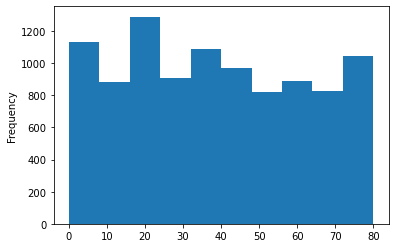

In [25]:
# take alook at cluster dristibution
X_df['cluster'].plot(kind='hist');

In [26]:
# songs per cluster overview
X_df['cluster'].value_counts()

18    283
19    239
8     232
0     230
75    222
     ... 
35     52
54     43
7      42
9      29
62     27
Name: cluster, Length: 81, dtype: int64

100%|██████████| 98/98 [01:29<00:00,  1.10it/s]


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

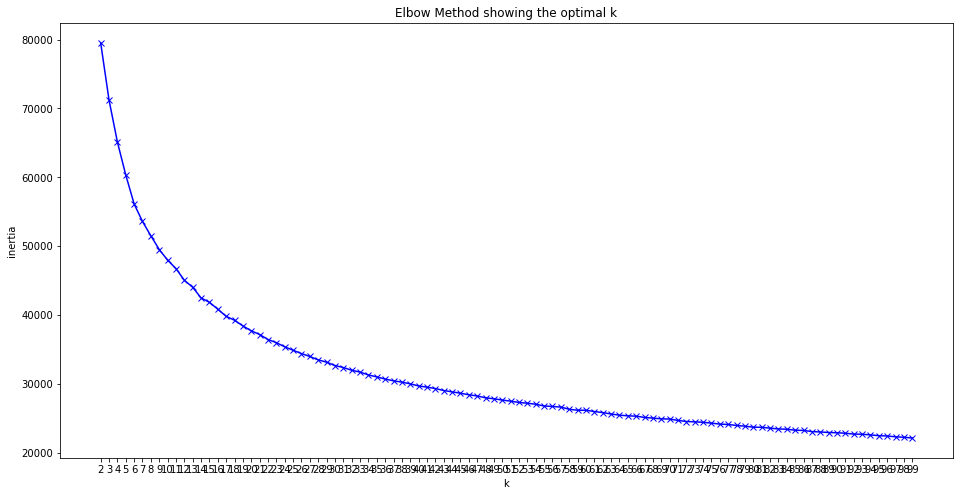

In [45]:

# tuning the model for inertia
K = range(2, 100)
inertia = []

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k,
                    random_state=17)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')


100%|██████████| 98/98 [02:48<00:00,  1.72s/it]


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

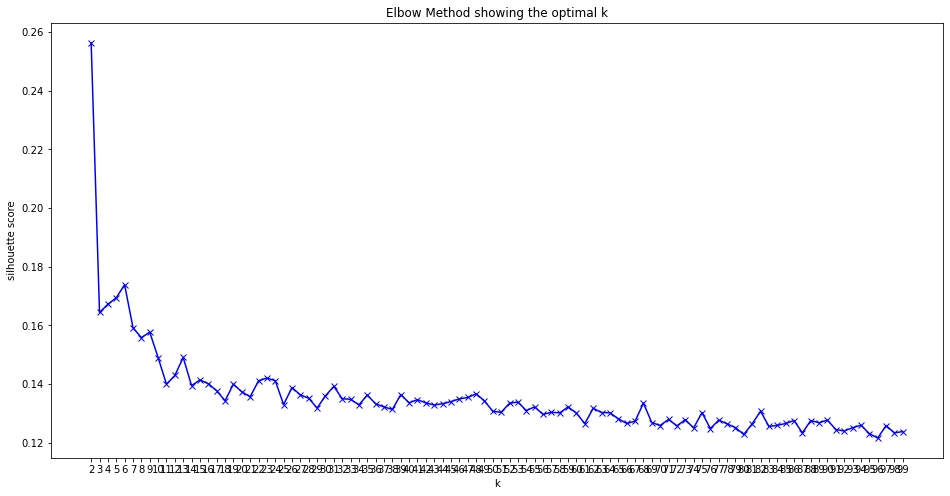

In [46]:
# tune for shilouette

K = range(2, 100)
silhouette = []

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep,
                                       kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')


In [27]:
clusters.shape

(9843,)

In [28]:
# create dataframe from scaled vales
musicclustered = pd.DataFrame(X_prep,  columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])

In [29]:
# add cluster ID to the dataframe
musicclustered['cluster_id'] = clusters

In [30]:
# adding Trackid, title and artist back to the dataframe
musicclustered['tid'] = original['tid']
musicclustered['artist'] = original['artist']
musicclustered['title'] = original['title']
musicclustered

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_id,tid,artist,title
0,1.026783,0.314932,-1.193932,0.630667,0.738549,-0.424550,-1.229003,-0.594192,0.618417,-0.382922,0.491431,37,03tqyYWC9Um2ZqU0ZN849H,waka flocka flame,no hands (feat. roscoe dash & wale)
1,1.933218,0.972119,0.215672,0.709186,-1.354006,1.270515,-1.200801,-0.594192,0.015207,1.638251,0.240988,78,1wLhwzPAtze5JT8qqXlqaO,trick daddy,take it to da house
2,1.648338,0.250989,1.343356,0.393186,-1.354006,2.397696,-1.090281,-0.594189,0.305061,0.992346,-0.843011,23,1BKT2I9x4RGKaKqW4up34s,dmx,ruff ryders' anthem
3,0.586515,0.616882,-0.348169,0.817133,-1.354006,1.903883,-1.065509,-0.594192,1.503646,1.373357,1.288715,63,4ns1XFP3W5JPyzvnAjMdHD,ugk,int'l players anthem (i choose you) (feat. out...
4,1.430794,0.773186,-1.193932,0.557236,-1.354006,1.753593,-1.243602,-0.594189,-0.000460,0.255725,1.107324,63,1bTphHXspys3RvvRxfzzIc,lil jon & the east side boyz,what u gon' do
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,-1.288509,0.048504,0.497593,0.208508,0.738549,-0.524386,-0.917151,0.666271,-0.491645,0.161380,0.911536,52,7sxr5Pvovng4ECTiCqeSWm,wilco,love is everywhere (beware)
9839,-0.558182,0.147970,-0.912011,-0.091541,0.738549,-0.257083,0.988367,0.398562,-0.794816,0.121464,-0.549774,21,4WDazmiEd5PyY3taS11VfD,orville peck,dead of night
9840,0.156606,-0.310285,-0.912011,0.207821,0.738549,-0.526533,-0.293774,-0.591347,-0.567634,-0.350264,0.108321,37,7oC1Lo7hqhpxIU8d5iH6cc,michaela anne,desert dove
9841,-0.174890,-0.598026,-0.066248,0.001416,-1.354006,-0.520092,1.393970,-0.376957,-0.016128,0.321041,-0.801139,22,4bDALATwj7AYLJ9h8cImWf,joan shelley,coming down for you


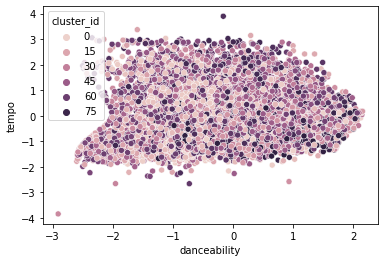

In [31]:
sns.scatterplot(data=musicclustered, x="danceability", y="tempo",hue='cluster_id');


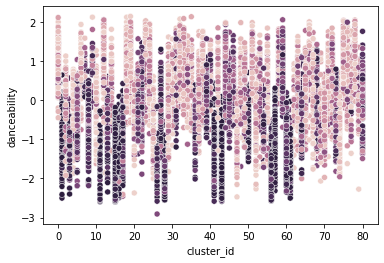

In [32]:
sns.scatterplot(data=musicclustered, x="cluster_id", y="danceability",hue='acousticness', legend=False);


# Clustering is done. Let's try to predict a cluster

In [33]:
# set clientID and client secret in global variables
import getpass 
clientid = '297ada524bde40a8a7e580b18966dbba'
clientsecret = getpass.getpass() 

········


In [34]:
# set the Auth token
sp=spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=clientid, client_secret=clientsecret))

In [35]:
# try with a track id
features = sp.audio_features('47EiUVwUp4C9fGccaPuUCS')[0]

In [36]:
# convert features into an np array
data = list(features.items())
features
predicter = pd.DataFrame(features, index=[0])
predicter = predicter.drop(['type','id','uri','track_href','analysis_url', 'duration_ms', 'time_signature'],axis =1)
predicter

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.731,0.573,4,-10.059,0,0.0544,0.401,0.000052,0.113,0.145,109.928


In [37]:
# safe the original scaler in a variable, so I can call it again later
scaler = StandardScaler().fit(X.drop(['cluster'], axis = 1))

In [38]:
# transform the song features into a scales array
predicter_scaled = scaler.transform(predicter)
predicter_scaled

array([[ 0.87657406,  0.23677949, -0.34816924,  0.12283861, -1.3540064 ,
        -0.26030365, -0.15222159, -0.59404605, -0.38432087, -1.16671582,
        -0.2191448 ]])

In [39]:
# predict cluster for that song
kmeans.predict(predicter_scaled)

array([65], dtype=int32)

## Predicting a cluster works. Now let's build the function that gives a recommendation back

In [40]:
# first get the track ID of a song that is beeing searched
a = sp.search(q= 'white washed')
a['tracks']['items'][0]['id']

'0jCUZSnjn6hxp7zgX3h2rF'

In [41]:
# now get the features with the trackID
features=sp.audio_features(tracks='0jCUZSnjn6hxp7zgX3h2rF')
features

[{'danceability': 0.213,
  'energy': 0.964,
  'key': 10,
  'loudness': -5.248,
  'mode': 0,
  'speechiness': 0.0737,
  'acousticness': 7.05e-06,
  'instrumentalness': 0.114,
  'liveness': 0.453,
  'valence': 0.335,
  'tempo': 106.537,
  'type': 'audio_features',
  'id': '0jCUZSnjn6hxp7zgX3h2rF',
  'uri': 'spotify:track:0jCUZSnjn6hxp7zgX3h2rF',
  'track_href': 'https://api.spotify.com/v1/tracks/0jCUZSnjn6hxp7zgX3h2rF',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0jCUZSnjn6hxp7zgX3h2rF',
  'duration_ms': 226253,
  'time_signature': 4}]

In [244]:
# check if I can access the dictionary
features[0]

{'danceability': 0.213,
 'energy': 0.964,
 'key': 10,
 'loudness': -5.248,
 'mode': 0,
 'speechiness': 0.0737,
 'acousticness': 7.05e-06,
 'instrumentalness': 0.114,
 'liveness': 0.453,
 'valence': 0.335,
 'tempo': 106.537,
 'type': 'audio_features',
 'id': '0jCUZSnjn6hxp7zgX3h2rF',
 'uri': 'spotify:track:0jCUZSnjn6hxp7zgX3h2rF',
 'track_href': 'https://api.spotify.com/v1/tracks/0jCUZSnjn6hxp7zgX3h2rF',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0jCUZSnjn6hxp7zgX3h2rF',
 'duration_ms': 226253,
 'time_signature': 4}

In [245]:
# create a dataframe from the dictionary
new = pd.DataFrame([features[0]])
final = new.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis = 1)


In [246]:
# take a look at the dataframe
final

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.213,0.964,10,-5.248,0,0.0737,0.000007,0.114,0.453,0.335,106.537


In [247]:
# looks good, just needs to be scaled
predictor = scaler.transform(final)

In [248]:
# predict and store result in a variable
bro = kmeans.predict(final)

In [249]:
# check output
bro

array([31], dtype=int32)

In [250]:
# can I access only the clusternumber?
bro[0]

31

In [251]:
# now filter the musicdatabase for the cluster
temp = musicclustered[musicclustered["cluster_id"]==31]
temp

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_id,tid,artist,title
154,-0.713571,0.112447,-0.912011,-0.833827,0.738549,0.192716,0.680762,-0.576233,-0.663207,0.121464,1.856609,31,7L5FEYVfpIEGHJOv6gZ6EW,ali farka touré,bonde (with ry cooder)
171,-0.817163,-0.388437,-0.348169,-0.021961,0.738549,-0.446020,1.064588,1.427568,-0.047464,0.810913,1.793224,31,0nF3QZLQ8O1vQ4SjD3IdRS,"ali farka touré, toumani diabaté",doudou
177,-1.200456,-0.132666,1.343356,-0.881681,0.738549,-0.402006,0.887647,0.158740,-0.544132,1.591078,1.948063,31,2fqcpLdEA1wVrL3mGNQ32v,ali farka touré,goydiotodam
190,-0.273303,0.485445,-0.066248,0.211121,0.738549,-0.279627,0.174439,0.125276,-0.826935,0.912515,1.819777,31,3r8tadrcfrmhmzZBrn78iz,ali farka touré,penda yoro
193,-1.573389,-0.050962,1.625277,-0.814713,0.738549,-0.452461,0.748816,1.148705,-0.859054,1.420530,1.877628,31,3Ddx0d6CGil3D7AfvrwTV4,ali farka touré,kenouna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9765,0.198043,-0.498560,-0.912011,0.298990,0.738549,0.454651,0.933924,-0.594192,1.417473,0.618593,2.079510,31,07oxahRLcoeCHuXgJD8mgB,raffi,market day
9782,0.446665,-1.141538,-0.912011,-0.542165,0.738549,-0.163688,1.192530,-0.594192,-0.703943,1.496732,1.442730,31,63n8zk4mEqyrTywaYVAkgz,raffi,who built the ark?
9786,0.177325,-0.107800,0.497593,0.109913,0.738549,-0.475005,-0.108667,-0.594192,0.743759,1.224582,2.264756,31,28smxYbciKWO6pXc1DSnzp,raffi,this little light of mine
9792,0.291276,-1.475815,-0.066248,-0.939985,0.738549,1.066549,0.923035,-0.594192,-0.526114,1.696309,1.947865,31,6TRdg2K2wsSaywx1f5FZA3,raffi,the sharing song


In [252]:
# we need to reset indexes of that temporary dataframe
temp = temp.reset_index()
temp

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_id,tid,artist,title
0,154,-0.713571,0.112447,-0.912011,-0.833827,0.738549,0.192716,0.680762,-0.576233,-0.663207,0.121464,1.856609,31,7L5FEYVfpIEGHJOv6gZ6EW,ali farka touré,bonde (with ry cooder)
1,171,-0.817163,-0.388437,-0.348169,-0.021961,0.738549,-0.446020,1.064588,1.427568,-0.047464,0.810913,1.793224,31,0nF3QZLQ8O1vQ4SjD3IdRS,"ali farka touré, toumani diabaté",doudou
2,177,-1.200456,-0.132666,1.343356,-0.881681,0.738549,-0.402006,0.887647,0.158740,-0.544132,1.591078,1.948063,31,2fqcpLdEA1wVrL3mGNQ32v,ali farka touré,goydiotodam
3,190,-0.273303,0.485445,-0.066248,0.211121,0.738549,-0.279627,0.174439,0.125276,-0.826935,0.912515,1.819777,31,3r8tadrcfrmhmzZBrn78iz,ali farka touré,penda yoro
4,193,-1.573389,-0.050962,1.625277,-0.814713,0.738549,-0.452461,0.748816,1.148705,-0.859054,1.420530,1.877628,31,3Ddx0d6CGil3D7AfvrwTV4,ali farka touré,kenouna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,9765,0.198043,-0.498560,-0.912011,0.298990,0.738549,0.454651,0.933924,-0.594192,1.417473,0.618593,2.079510,31,07oxahRLcoeCHuXgJD8mgB,raffi,market day
121,9782,0.446665,-1.141538,-0.912011,-0.542165,0.738549,-0.163688,1.192530,-0.594192,-0.703943,1.496732,1.442730,31,63n8zk4mEqyrTywaYVAkgz,raffi,who built the ark?
122,9786,0.177325,-0.107800,0.497593,0.109913,0.738549,-0.475005,-0.108667,-0.594192,0.743759,1.224582,2.264756,31,28smxYbciKWO6pXc1DSnzp,raffi,this little light of mine
123,9792,0.291276,-1.475815,-0.066248,-0.939985,0.738549,1.066549,0.923035,-0.594192,-0.526114,1.696309,1.947865,31,6TRdg2K2wsSaywx1f5FZA3,raffi,the sharing song


In [253]:
# generate random integer
random = randint(0, len(temp))

In [254]:
# what is the integer
random

74

In [255]:
# now extract a recommendation from the temp dataframe with the random integer
title = temp.iloc[random].values[14]
artist = temp.iloc[random].values[15];
print(title)
print(artist)

bing crosby
pistol packin' mama - single version


In [256]:
# lets put the work above in a function:

def spotify_recomendation():
    user = input("Please enter a song title: ") # get song
    a = sp.search(q=user) # search song
    track_id = (a['tracks']['items'][0]['id']) # get id
    features = sp.audio_features(tracks=track_id) # get features from id
    df_for_features = pd.DataFrame([features[0]]) # create dataframe of the features
    df_for_features = df_for_features.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis = 1) # drop unnecessary columns
    final = scaler.transform(df_for_features) # scale the features
    cluster_array=kmeans.predict(final) # predict the cluster from the scaled features
    cluster = cluster_array[0] # store in variable
    temp = musicclustered[musicclustered["cluster_id"]==cluster] # create temp dataframe
    temp = temp.reset_index() # reset index
    random = randint(0, len(temp)) # generate random variable
    
    title = temp.iloc[random].values[14] # locate variable in temp dataframe and extraxt title
    artist = temp.iloc[random].values[15] # extract artist
    return title, artist # print results


In [207]:
# try if it works
spotify_recomendation()

Please enter a song title: save your tears


('various artists', 'bachke rehna re baba - pukar / soundtrack version')

# It's working, amazing!
lets import the MVP and see if we can put it all together

In [42]:
# import songs as dataframes
greatest = pd.read_csv("greatest.csv")
alltime = pd.read_csv("alltime.csv")
hot100 = pd.read_csv("hot100.csv")

In [43]:
# function to recommend songs
def recommend_song():
    
    user = input('Enter a song title: ')
    song_in_hot100 = False
    song_in_greatest = False
    song_in_alltime = False
    isartist = False
    
    
    if user.lower() in hot100['title'].values: # check if in hot100
        song_in_hot100 = True
    elif user.lower() in greatest['title'].values: # check if in rolling stones best hits of all time
        song_in_greatest = True
    elif user.lower() in alltime['title'].values: # check if in 100 top tits allimte
        song_in_alltime = True
    elif user.lower() in hot100['artist'].values or user.lower()in greatest['artist'].values or user.lower()in alltime['artist'].values:
        isartist = True # check if in artist column of any of these lists
        
        
    else: # this part of the function calls the spotify api and 
        a = sp.search(q=user) # search user input
        
        track_id = (a['tracks']['items'][0]['id']) # get track ID of that input
        features = sp.audio_features(tracks=track_id) # get features from track id
        df_for_features = pd.DataFrame([features[0]]) #build dataframe from the features dictionary
        df_for_features = df_for_features.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis = 1) # drop columns that are unnecessary for the model
        final = scaler.transform(df_for_features) # scale features
        cluster_array=kmeans.predict(final) # get predicted cluster
        cluster = cluster_array[0] # turn cluster array into a integer number
        temp = musicclustered[musicclustered["cluster_id"]==cluster] # create new temporary dataframe that only has the cluster_id that the prediction has
        temp = temp.reset_index() # reset index of the dataframe
        random = randint(0, len(temp)) # create random integer between 0 and the number of songs on the temp dataframe
    
        
        title = temp.iloc[random].values[14] # select the column that contains the integer, extract content from title colum
        artist = temp.iloc[random].values[15] # select the column that contains the integer, extract content from songname colum
        print('Based on your awesome taste in music we recommend: ') # print recommendation
        print('---------------------------')
        print("Title: " + str(title))
        print("Artist: " + str(artist))
        again = input("Do you want to try it again? ")
        if again.lower() == 'yes':
            print("Here we go")
            recommend_song()
        else:
            print("Thanks for using our service")
        

       
    if song_in_hot100 == True: # if song is on hot 100 list, recommend one from the list
        r = randint(0, 99)
        print()
        print('That song is currently in the hot100!\nCheck this tune out:\n')
        print('---------------------------')
        title = hot100.iloc[r].values[0]
        artist = hot100.iloc[r].values[1];
        print("Title: " + str(title))
        print("Artist: " + str(artist))
        
        
    if song_in_greatest == True: # if song is in rolling stones top 500 recommend one from there
        r = randint(0, 499)
        print()
        print('That song is one of the rolling stones top 500 songs of all time!\nYou might also like this one:\n')
        print('---------------------------')
        title = greatest.iloc[r].values[0]
        artist = greatest.iloc[r].values[1];
        print("Title: " + str(title))
        print("Artist: " + str(artist))
        
        
    if song_in_alltime == True: # if song is in the third list recommend one from there
        r = randint(0, 99)
        print()
        print('That song is one of the greatest of all time!\nI can recommend this one as well:\n')
        print('---------------------------')
        title = alltime.iloc[r].values[0]
        artist = alltime.iloc[r].values[1];
        print("Title: " + str(title))
        print("Artist: " + str(artist))   
        
        
    if isartist == True: # if input is an artist, try again
        print("Hm, looks like you entered an artist. Please enter a song")
        recommend_song

In [44]:
recommend_song()

Enter a song title: highway to hell

That song is one of the rolling stones top 500 songs of all time!
You might also like this one:

---------------------------
Title: elvis presley
Artist: all shook up
